<a href="https://colab.research.google.com/github/dankrelium/Pos-Graduacao/blob/main/MVP_ML_e_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [76]:
#!pip install transformers
#!pip install fuzzywuzzy

In [149]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import sklearn as sk
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Conv1D, LSTM, Dense, Bidirectional, Dropout
#from keras.layers import LSTM
#from keras.layers import Dense
#from keras.layers import Bidirectional
#from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import confusion_matrix
import itertools

import re
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Modelo 1: Machine Learning Cl√°ssico

Para esta estapa foi escolhido um problema de regress√£o.

O dataset foi extra√≠do do [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) e consiste em 1460 registros de im√≥veis vendidos em Ames (Iowa-EUA) com 81 atributos em cada registro, como tipo de im√≥vel, metragem quadrada, quantidade de quartos, etc, incluindo o valor de venda do im√≥vel, que ser√° o target.


##**An√°lise e tratamento dos dados**



Os atributos foram analisados um a um de acordo com a descri√ß√£o fornecida pelo Kaggle, e definidos de acordo com a seguinte l√≥gica:

Num√©ricos ordinais: float.

Num√©ricos categ√≥ricos: object.

Categ√≥ricos: object.

Outro objetivo dessa an√°lise foi identificar os atributos categ√≥ricos ordinais para posteriormente transform√°-los em n√∫meros de acordo com sua hierarquia.

In [78]:
# Definindo o dtype das colunas ao carregar o arquivo
dtype = {'MSSubClass': object, 'MSZoning': object, 'LotFrontage': float, 'LotArea':object, 'Street':object, 'Alley':object, 'LotShape':object,
         'LandContour':object, 'Utilities':object, 'LotConfig':object, 'LandSlope':object, 'Neighborhood':object, 'Condition1':object,
         'Condition2':object, 'BldgType':object, 'HouseStyle':object, 'OverallQual':float, 'OverallCond':float, 'YearBuilt':float,
         'YearRemodAdd':float, 'RoofStyle':object, 'RoofMatl':object, 'Exterior1st':object, 'Exterior2nd':object, 'MasVnrType':object,
         'MasVnrArea':float, 'ExterQual':object, 'ExterCond':object, 'Foundation':object, 'BsmtQual':object, 'BsmtCond':object,
         'BsmtExposure':object, 'BsmtFinType1':object, 'BsmtFinSF1':float, 'BsmtFinType2':object, 'BsmtFinSF2':float, 'BsmtUnfSF':float,
         'TotalBsmtSF':float, 'Heating':object, 'HeatingQC':object, 'CentralAir':object, 'Electrical':object, '1stFlrSF':float, '2ndFlrSF':float,
         'LowQualFinSF':float, 'GrLivArea':float, 'BsmtFullBath':float, 'BsmtHalfBath':float, 'FullBath':float, 'HalfBath':float, 'Bedroom':float,
         'Kitchen':float, 'KitchenQual':object, 'TotRmsAbvGrd':float, 'Functional':object, 'Fireplaces':float, 'FireplaceQu':object,
         'GarageType':object, 'GarageYrBlt':float, 'GarageFinish':object, 'GarageCars':float, 'GarageArea':float, 'GarageQual':object,
         'GarageCond':object, 'PavedDrive':object, 'WoodDeckSF':float, 'OpenPorchSF':float, 'EnclosedPorch':float, '3SsnPorch':float,
         'ScreenPorch':float, 'PoolArea':float, 'PoolQC':object, 'Fence':object, 'MiscFeature':object, 'MiscVal':float, 'MoSold':object,
         'YrSold':object, 'SaleType':object}

df = pd.read_csv('https://raw.githubusercontent.com/dankrelium/Pos-Graduacao/main/AI/data/real_state.csv', dtype=dtype)
#df = pd.read_csv('/content/drive/MyDrive/P√ìS CD E IA/MVP ML e IA/train.csv', dtype=dtype)
df = df.drop(['Id'], axis=1) # Remo√ß√£o de atributo irrelevante

Dos 13 atributos categ√≥ricos ordinais, 10 compartilham das mesmas categorias (Ex, Gd, TA, Fa, Po). Destas, 5 compartilham uma categoria extra (NA), em que:

Ex = Excellent

Gd = Good

TA = Typical

Fa = Fair

Po = Poor

NA = No ***Basement (or Garage, Pool, Fireplace...)***

Ou seja, estes atributos avaliam a qualidade de uma parte da casa, e 'NA' indica que a casa n√£o possui tal parte.

Como veremos a seguir, n√£o h√° valores 'NA' no dataframe, ent√£o assumiremos que estes constam como NAN (a an√°lise do boxplot corroborou essa tese).

In [79]:
colunas_categoricas_ordinais = ['ExterQual', 'ExterCond', "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

In [80]:
for coluna in df[colunas_categoricas_ordinais]:
    valores_unicos = df[coluna].unique()
    print(f"Valores √∫nicos em {coluna}: {valores_unicos}")

Valores √∫nicos em ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
Valores √∫nicos em ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Valores √∫nicos em BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
Valores √∫nicos em BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
Valores √∫nicos em HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Valores √∫nicos em KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
Valores √∫nicos em FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Valores √∫nicos em GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Valores √∫nicos em GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Valores √∫nicos em PoolQC: [nan 'Ex' 'Fa' 'Gd']


In [81]:
nulos_por_coluna = df.isnull().sum()
nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]
print(nulos_por_coluna)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [82]:
# Substituindo os valores NaN por "NA" nas colunas categ√≥ricas
df[colunas_categoricas_ordinais] = df[colunas_categoricas_ordinais].fillna('NA')

Transforma√ß√£o das categorias ordinais em n√∫meros:

In [83]:
# Mapear as substitui√ß√µes desejadas
substituicoes = {'Ex': 5,'Gd': 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0}
# Aplicar as substitui√ß√µes nas colunas especificadas
colunas_especificas = ['ExterQual', 'ExterCond', "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
df[colunas_especificas] = df[colunas_especificas].replace(substituicoes).astype(float)

Transforma√ß√£o das categorias ordinais com qualidades singulares em n√∫meros:

In [84]:
df["LotShape"] = df["LotShape"].replace({'Reg':3,'IR1':2,"IR2": 1,"IR3": 0}).astype(float)
df["LandSlope"] = df["LandSlope"].replace({'Sev': 2,'Mod': 1,"Gtl": 0}).astype(float)
df["BsmtExposure"] = df["BsmtExposure"].replace({'Gd':4,'Av': 3,"Mn": 2, "No":1,"NA": 0}).astype(float)

Verifica√ß√£o dos valores nulos do dataset por coluna:

In [85]:
nulos_por_coluna = df.isnull().sum()
nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]
print(nulos_por_coluna)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
GarageType        81
GarageYrBlt       81
GarageFinish      81
Fence           1179
MiscFeature     1406
dtype: int64


Conferindo os index dos valores nulos dos atributos **MasVnrType** e **MasVnrArea**

In [86]:
df[df[["MasVnrType", "MasVnrArea"]].isnull().any(axis=1)].index

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')

Os oito registros nulos de cada atributo correspondem aos mesmo 8 em ambos, ent√£o deletaremos os registros.

In [87]:
df = df.dropna(subset=["MasVnrType", "MasVnrArea"])

Os mesmos crit√©rios aplicados em **MasVnrType** e **MasVnrArea** tamb√©m ser√£o usados em **BsmtExposure**, **BsmtFinType1** e **BsmtFinType2**.

In [88]:
df[df[["BsmtExposure", "BsmtFinType1", "BsmtFinType2"]].isnull().any(axis=1)].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  332,  342,  362,  371,
             392,  520,  532,  533,  553,  646,  705,  736,  749,  778,  868,
             894,  897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090,
            1179, 1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [89]:
df = df.dropna(subset=["BsmtExposure", "BsmtFinType1", "BsmtFinType2"])

Deletando registro com **Electrical**, **GarageType**, **GarageYrBlt** e **GarageFinish** nulos:

In [90]:
df = df.dropna(subset=["Electrical", "GarageType", "GarageYrBlt", "GarageFinish"])

In [91]:
nulos_por_coluna = df.isnull().sum()
nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]
print(nulos_por_coluna)

LotFrontage     244
Alley          1257
Fence          1077
MiscFeature    1289
dtype: int64


Os quatro atributos com NAN que sobraram ser√£o exclu√≠dos na etapa de feature selection pois possuem baixa correla√ß√£o com o target, como veremos a seguir.

**Feature selection:**

Atributos num√©ricos:

Utilizaremos o m√©todo de c√°lculo da correla√ß√£o de pearson. Ser√£o inclu√≠dos atributos com correla√ß√£o em valor absoluto maior que 0.4

In [92]:
corr_cut = 0.4
corr_matrix = df.corr()
corr_col1 = corr_matrix['SalePrice']
corr_cols_high = list(corr_col1[abs(corr_col1) > corr_cut].index) # Colunas com correla√ß√£o maior que corr_cut
corr_cols_low = list(corr_col1[abs(corr_col1) <= corr_cut].index) # Colunas com correla√ß√£o menor ou igual a corr_cut
corr_col1

LotFrontage      0.343978
LotShape        -0.261992
LandSlope        0.061629
OverallQual      0.783546
OverallCond     -0.108627
YearBuilt        0.504297
YearRemodAdd     0.501435
MasVnrArea       0.465811
ExterQual        0.669504
ExterCond       -0.014200
BsmtQual         0.643452
BsmtCond         0.141028
BsmtExposure     0.359809
BsmtFinSF1       0.359677
BsmtFinSF2      -0.031226
BsmtUnfSF        0.191689
TotalBsmtSF      0.602042
HeatingQC        0.416404
1stFlrSF         0.604714
2ndFlrSF         0.311354
LowQualFinSF    -0.009992
GrLivArea        0.711706
BsmtFullBath     0.209695
BsmtHalfBath    -0.030175
FullBath         0.569313
HalfBath         0.258175
BedroomAbvGr     0.169266
KitchenAbvGr    -0.111408
KitchenQual      0.650226
TotRmsAbvGrd     0.551821
Fireplaces       0.445434
FireplaceQu      0.497192
GarageYrBlt      0.481730
GarageCars       0.640154
GarageArea       0.607535
GarageQual       0.160960
GarageCond       0.121846
WoodDeckSF       0.305983
OpenPorchSF 

Atributos categ√≥ricos:

Utilizaremos o m√©todo de an√°lise de vari√¢ncia (ANOVA). Ser√£o inclu√≠dos atributos com valor maior que 30.

In [93]:
f_cut = 30
# Cria uma lista com as colunas cujo f_value √© maior que 3
selected_categ_cols = []
for col in df.select_dtypes(include='object'):
    groups = df.groupby(col)['SalePrice'].apply(list)
    f_value, p_value = f_oneway(*groups)
    if f_value > f_cut:
        selected_categ_cols.append(col)
    print(f'{col}: F={f_value:.2f}, p-value={p_value:.3f}')

MSSubClass: F=26.52, p-value=0.000
MSZoning: F=38.84, p-value=0.000
LotArea: F=4.04, p-value=0.000
Street: F=2.37, p-value=0.124
Alley: F=26.14, p-value=0.000
LandContour: F=12.70, p-value=0.000
Utilities: F=0.39, p-value=0.533
LotConfig: F=6.85, p-value=0.000
Neighborhood: F=60.89, p-value=0.000
Condition1: F=5.08, p-value=0.000
Condition2: F=2.01, p-value=0.051
BldgType: F=8.74, p-value=0.000
HouseStyle: F=16.79, p-value=0.000
RoofStyle: F=17.00, p-value=0.000
RoofMatl: F=6.47, p-value=0.000
Exterior1st: F=19.49, p-value=0.000
Exterior2nd: F=17.08, p-value=0.000
MasVnrType: F=91.02, p-value=0.000
Foundation: F=104.68, p-value=0.000
BsmtFinType1: F=64.19, p-value=0.000
BsmtFinType2: F=3.54, p-value=0.003
Heating: F=1.54, p-value=0.204
CentralAir: F=55.53, p-value=0.000
Electrical: F=16.73, p-value=0.000
Functional: F=3.52, p-value=0.002
GarageType: F=67.01, p-value=0.000
GarageFinish: F=236.66, p-value=0.000
PavedDrive: F=22.83, p-value=0.000
Fence: F=4.07, p-value=0.008
MiscFeature: 

*(O texto a seguir escrevi para entender melhor como interpretar os resultados da ANOVA)*

**f_value** = vari√¢ncia das m√©dias dos grupos / m√©dia das vari√¢ncias dentro dos grupos.

Quanto maior f_value maior a rela√ß√£o do atributo com a forma√ß√£o do pre√ßo, pois maior vari√¢ncia das m√©dias dos grupos implica maior diferen√ßa de pre√ßo entre os grupos, ao passo que quanto menor a m√©dia das vari√¢ncias dentro dos grupos maior √© a especificidade de pre√ßo em cada grupo.

Maximixando vari√¢ncia das m√©dias dos grupos e minimizando m√©dia das vari√¢ncias dentro dos grupos, temos que f_value maiores s√£o melhores.

**p-value** representa a probabilidade dos resultados terem acontecido por acaso, portanto quanto menor melhor.


**Obs.:** Na ANOVA dos dados, todos os atributos com **p-value > 0**  possuem  **f_value** pequeno.

Aplicando OneHotEncoder nos atributos categ√≥ricos:

In [94]:
# Criando o objeto OneHotEncoder
encoder = OneHotEncoder()

# Ajustando e transformando os dados
encoded_data = encoder.fit_transform(df[selected_categ_cols]).toarray()

# Criando um DataFrame com os dados codificados
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(selected_categ_cols))

# Redefinindo os valores de √≠ndice no DataFrame codificado
encoded_df.index = df[selected_categ_cols].index.values

Agora vamos juntar os atributos com correla√ß√£o > 0.4 ou f_value > 30 em um √∫nico dataframe.

In [95]:
# Cria um novo dataframe com as colunas selecionadas
df_tratado = pd.concat([df[corr_cols_high], encoded_df], axis=1)

df_tratado_padronizado = pd.DataFrame(StandardScaler().fit_transform(df_tratado), columns=df_tratado.columns)
df_tratado_normalizado = pd.DataFrame(MinMaxScaler().fit_transform(df_tratado), columns=df_tratado.columns)

In [96]:
print("Rechecagem: Total de valores nulos no dataframe final: ", df_tratado.isnull().sum().sum())

Rechecagem: Total de valores nulos no dataframe final:  0


In [97]:
df_tratado.shape

(1338, 81)

Ap√≥s o processamento dos dados ficamos com um dataframe com 1338 registros.

Ap√≥s remover alguns atributos e aplicar OneHotEncoder em outros, coincidentemente ficamos com as mesmas 81 colunas iniciais.

In [98]:
# Separar as colunas de entrada (X) e sa√≠da (Y)
X = df_tratado.drop(['SalePrice'], axis=1)  # Colunas de entrada
y = df_tratado['SalePrice']  # Coluna alvo/sa√≠da

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Criando os folds para a valida√ß√£o cruzada
scoring = 'mean_squared_error'
num_particoes = 10 # n√∫mero de folds da valida√ß√£o cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## Modelagem

LR-orig: MSE 1372380573.99 (766567466.00) - RMSE 37045.66
Ridge-orig: MSE 1365590050.03 (777360712.82) - RMSE 36953.89
Lasso-orig: MSE 1371834428.84 (767297929.81) - RMSE 37038.28
KNN-orig: MSE 1892531676.47 (622310750.22) - RMSE 43503.24
CART-orig: MSE 2036628275.87 (894807300.25) - RMSE 45129.02
RF-orig: MSE 1004434891.73 (501165310.15) - RMSE 31692.82
GB-orig: MSE 881577801.33 (515722607.90) - RMSE 29691.38
AB-orig: MSE 1347590377.14 (549989485.02) - RMSE 36709.54
ET-orig: MSE 910553141.74 (470320418.96) - RMSE 30175.37
MLP-orig: MSE 2930717704.70 (795348363.59) - RMSE 54136.10
Ridge-padr: MSE 1370574628.60 (764200678.30) - RMSE 37021.27
Lasso-padr: MSE 1371910304.49 (766855589.52) - RMSE 37039.31
KNN-padr: MSE 1730647030.85 (511506800.96) - RMSE 41601.05
CART-padr: MSE 1769099528.32 (688357651.87) - RMSE 42060.66
RF-padr: MSE 1029722451.03 (478342389.79) - RMSE 32089.29
GB-padr: MSE 903557609.37 (512765497.24) - RMSE 30059.24
AB-padr: MSE 1286184122.15 (564061929.85) - RMSE 35863.4

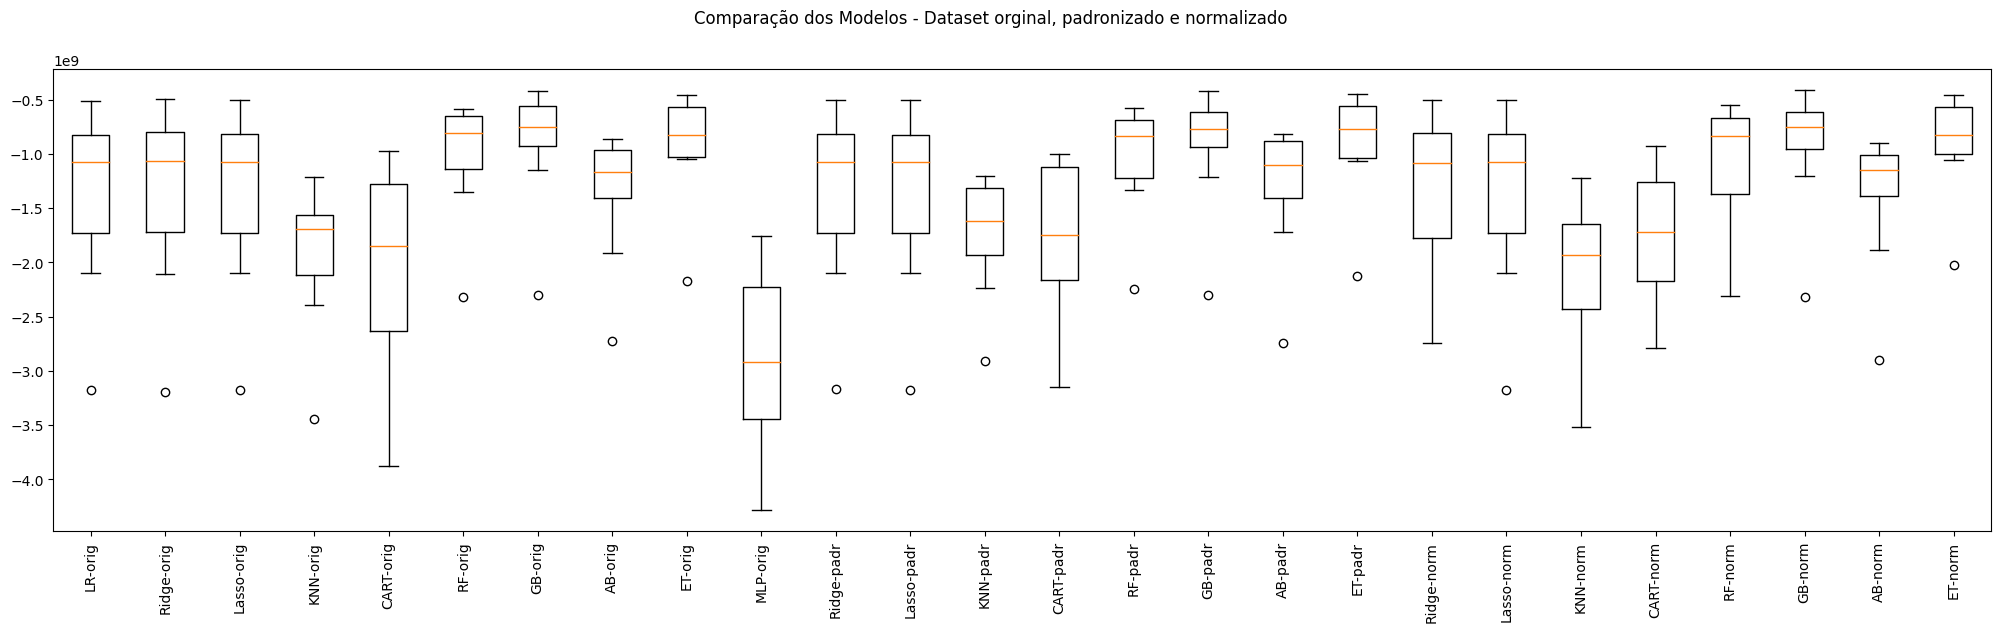

In [23]:
np.random.seed(42) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as vis√µes do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que ser√£o utilizados
lin_reg = ('LR', LinearRegression())
ridge = ('Ridge', Ridge())
lasso = ('Lasso', Lasso())
knn = ('KNN', KNeighborsRegressor())
decision_tree = ('CART', DecisionTreeRegressor())
svr = ('SVM', SVR())
random_forest = ('RF', RandomForestRegressor())
gradient_boost = ('GB', GradientBoostingRegressor())
ada_boost= ('AB', AdaBoostRegressor())
extra_trees= ('ET', ExtraTreesRegressor())
multi_layer_perceptron= ('MLP', MLPRegressor())

# Transforma√ß√µes que ser√£o utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([lin_reg])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('Lasso-orig', Pipeline([lasso])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([decision_tree])))
#pipelines.append(('SVM-orig', Pipeline([svr]))) SVM foi removido pois errou por muito as previs√µes atrapalhando a visualiza√ß√£o gr√°fica dos resultados
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('GB-orig', Pipeline([gradient_boost])))
pipelines.append(('AB-orig', Pipeline([ada_boost])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('MLP-orig', Pipeline([multi_layer_perceptron])))

# Dataset Padronizado
#pipelines.append(('LR-padr', Pipeline([standard_scaler, lin_reg]))) LR-padr foi removido pois errou por muito as previs√µes
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge])))
pipelines.append(('Lasso-padr', Pipeline([standard_scaler, lasso])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, decision_tree])))
#pipelines.append(('SVM-padr', Pipeline([standard_scaler, svr]))) SVM-padr foi removido pois errou por muito as previs√µes
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boost])))
pipelines.append(('AB-padr', Pipeline([standard_scaler, ada_boost])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
#pipelines.append(('MLP-padr', Pipeline([standard_scaler, multi_layer_perceptron]))) MLP-padr foi removido pois errou por muito as previs√µes

# Dataset Normalizado
#pipelines.append(('LR-norm', Pipeline([min_max_scaler, lin_reg]))) LR-norm foi removido pois errou por muito as previs√µes
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('Lasso-norm', Pipeline([min_max_scaler, lasso])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, decision_tree])))
#pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svr]))) SVM-norm foi removido pois errou por muito as previs√µes
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boost])))
pipelines.append(('AB-norm', Pipeline([min_max_scaler, ada_boost])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
#pipelines.append(('MLP-norm', Pipeline([min_max_scaler, multi_layer_perceptron]))) MLP-norm foi removido pois errou por muito as previs√µes

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
    results.append(cv_results)
    names.append(name)
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)


# Boxplot de compara√ß√£o dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Compara√ß√£o dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Grid search no gradient boost:

In [29]:
# Tuning do GB

np.random.seed(42)

pipelines = []

# Definindo os componentes do pipeline
gradient_boost = ('GB', GradientBoostingRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline(steps=[gradient_boost])))
pipelines.append(('gb-padr', Pipeline(steps=[standard_scaler, gradient_boost])))
#pipelines.append(('gb-norm', Pipeline(steps=[min_max_scaler, gradient_boost])))

param_grid = {
    "GB__n_estimators":[ 1000, 2000, 4000],
    "GB__learning_rate": [0.01, 0.1],
    "GB__subsample": [0.3, 0.5, 0.7],
    "GB__max_depth": [1, 3, 5]
    }


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="neg_mean_squared_error", cv=kfold)
    grid.fit(X_train, y_train)

    # imprime a melhor configura√ß√£o
    print("%s - Melhor: %f usando %s" % (name, np.sqrt(abs(grid.best_score_)), grid.best_params_))

GB-orig - Melhor: 28625.285909 usando {'GB__learning_rate': 0.01, 'GB__max_depth': 3, 'GB__n_estimators': 2000, 'GB__subsample': 0.7}
gb-padr - Melhor: 28658.842937 usando {'GB__learning_rate': 0.01, 'GB__max_depth': 3, 'GB__n_estimators': 2000, 'GB__subsample': 0.7}


No grid search acima, a abrang√™ncia dos hiperpar√¢metros foi reajustada sempre que o melhor resultado era encontrado em algum valor na ponta (exemplo: [ponta, x, y, z, ponta]).

Utilizar uma varia√ß√£o muito grande de hiperpar√¢metros era invi√°vel pois o treinamento demorava tempo demais.

A vers√£o 'gb-norm' foi exclu√≠da do GridSearchCV pois ap√≥s algumas execu√ß√µes deste constatou-se que a vers√£o normalizada nunca era melhor que a original ou a padronizada, e acabava aumentando significativamente o tempo de execu√ß√£o da c√©lula.


O conjunto completo de configura√ß√µes testadas de hiperpar√¢metros foi:

GB__n_estimators:[10, 50, 100, 500, 1000, 2000]

GB__learning_rate: [0.0001, 0.001, 0.01, 0.1, 1.0]

GB__subsample: [0.3, 0.5, 0.7, 1.0]

GB__max_depth: [1, 3, 7, 9]



In [30]:
# O melhor modeloGridSearchCV
best_model = grid.best_estimator_

## Resultado

In [31]:
y_pred = best_model.predict(X_test)

In [109]:
print("A m√©dia do target nos valores de teste √©", round(y_test.mean()), "contra", round(y_train.mean()), "do grupo de treino.")
print("O erro absoluto do teste ficou em", round(mean_absolute_error(y_test, y_pred)), "contra 28658 do treino.")

A m√©dia do target nos valores de teste √© 179175 contra 187606 do grupo de treino.
O erro absoluto do teste ficou em 18372 contra 28658 do treino.


Ou seja, o modelo performou melhor no teste que no treino.

Abaixo prepararemos os dados para organizar a visualiza√ß√£o dos dados de previs√£o do modelo na base de teste.

In [133]:
df_test_prev = pd.DataFrame()
df_test_prev['test'] = pd.DataFrame(y_test)
df_test_prev['prev'] = y_pred

df_test_prev_sorted = df_test_prev.sort_values(by='test')
df_test_prev_sorted = df_test_prev_sorted.reset_index(drop=False)

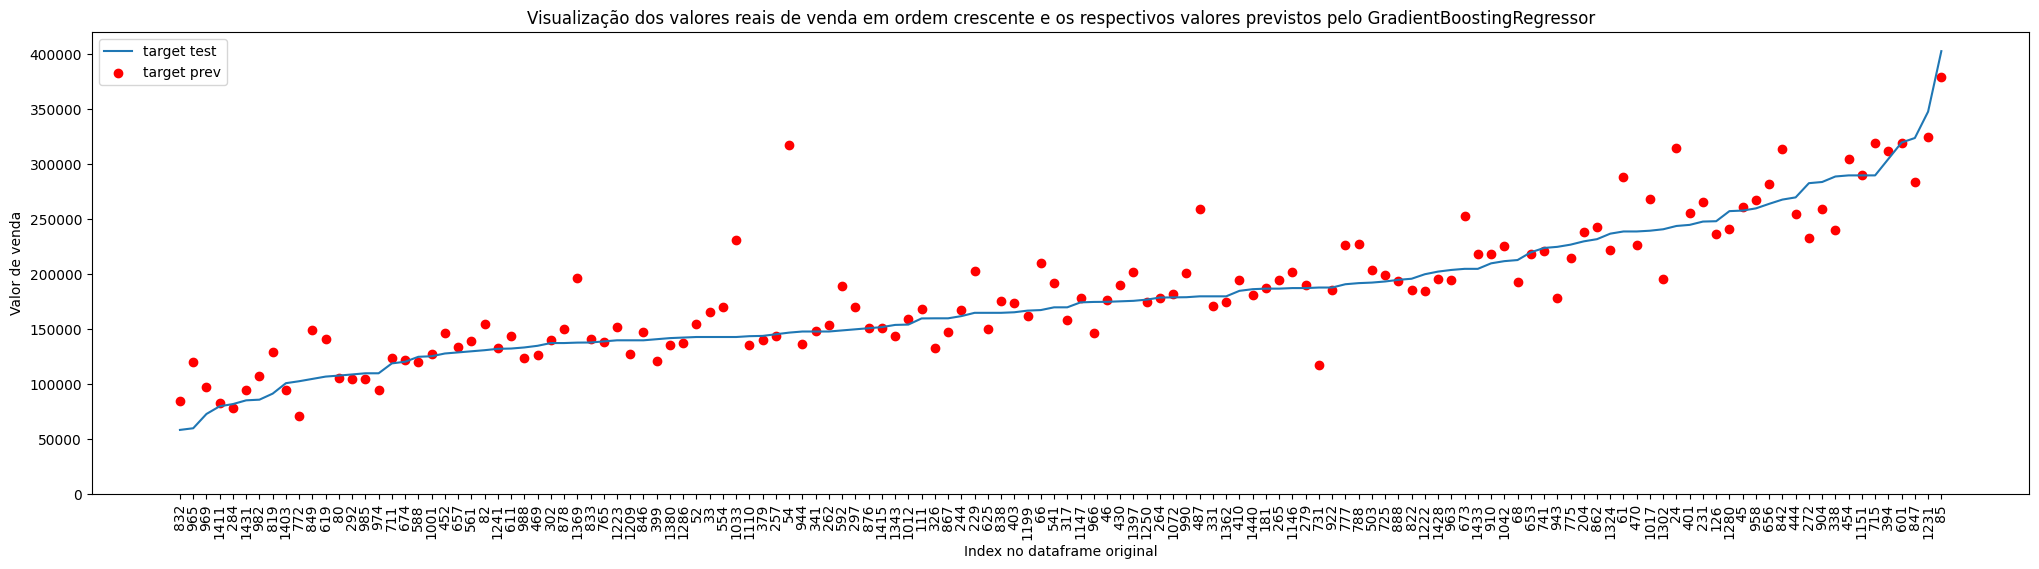

In [147]:
fig = plt.figure(figsize=(25,6))

# Plotar a coluna 'test' como linha e a coluna 'prev' como pontos
plt.plot(df_test_prev_sorted.index, df_test_prev_sorted['test'], label='target test')
plt.scatter(df_test_prev_sorted.index, df_test_prev_sorted['prev'], color='red', label='target prev')

plt.legend() # Adicionar legenda
plt.xlabel('Index no dataframe original') # Adiciona label ao eixo x
plt.ylabel('Valor de venda') # Adiciona label ao eixo y
plt.title('Visualiza√ß√£o dos valores reais de venda em ordem crescente e os respectivos valores previstos pelo GradientBoostingRegressor') # Adicionar um t√≠tulo ao gr√°fico
plt.xticks(df_test_prev_sorted.index, df_test_prev.index, rotation=90) # Definir o √≠ndice como r√≥tulos nominais no eixo x
plt.ylim(0) # Definir o limite m√≠nimo do eixo y para 0
plt.show() # Exibir o gr√°fico

Conclus√£o:

Ao analisar o resultado do modelo, devemos levar em considera√ß√£o que o valor de venda de um im√≥vel √© parcialmente subjetivo, ou seja, depende da avalia√ß√£o pessoal de valor de quem vende e quem compra. Dito isso, era de se esperar alguma dispers√£o entre o valor de venda real e o previsto, e que o algoritmo funcionasse como uma refer√™ncia de tend√™ncia do pre√ßo. Podemos ver no gr√°fico postado acima que os valores previstos orbitam pr√≥ximo ao valor real, como desejado, e que a dispers√£o m√©dia fica pr√≥xima de 10%, indicando um bom desempenho.

# Modelo 2: Deep Learning

O dataset foi extra√≠do do [Kaggle](https://www.kaggle.com/datasets/arnabchaki/tripadvisor-reviews-2023) e consiste em quase 150 mil reviews retiradas do Tripadvisor.

O objetivo deste notebook ser√° tentar criar um modelo de deep learning capaz de adivinhar a nota(rating) de 1 a 5 do review com base no texto deste.

Existe certa subjetividade nesta tarefa, como reviews id√™nticas receberem notas diferentes por quest√µes pessoais de cada usu√°rio, portanto ser√° analisado n√£o somente a precis√£o de acertos, como tamb√©m a proximidade da nota prevista com a nota de fato. Para tal, ser√£o utilizadas as m√©tricas de **accuracy** e **MeanSquaredError**.


## An√°lise e tratamento dos dados

In [150]:
#df = pd.read_csv('/content/drive/MyDrive/P√ìS CD E IA/MVP ML e IA/New_Delhi_reviews.csv', dtype = {'rating_review': float, 'review_full': str})
df = pd.read_csv('https://github.com/dankrelium/Pos-Graduacao/releases/download/New_Delhi_reviews/New_Delhi_reviews.csv', dtype = {'rating_review': float, 'review_full': str})

In [151]:
df.head()

rating_review                                        review_full
0            5.0  Totally in love with the Auro of the place, re...
1            5.0  I went this bar 8 days regularly with my husba...
2            5.0  We were few friends and was a birthday celebra...
3            5.0  Fatjar Cafe and Market is the perfect place fo...
4            5.0  Hey Guys, if you are craving for pizza and sea...

In [152]:
df = df.dropna() # exclui registros sem avalia√ß√£o escrita ou nota

In [153]:
df.isnull().any() # Verifica se h√° valores nulos

rating_review    False
review_full      False
dtype: bool

In [154]:
df.shape

(147579, 2)

In [155]:
df.dtypes

rating_review    float64
review_full       object
dtype: object

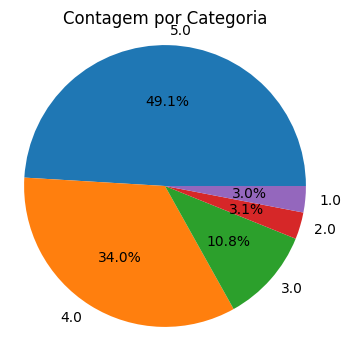

In [156]:
# Agrupar e contar o n√∫mero de ocorr√™ncias por categoria
counts = df['rating_review'].value_counts()

# Plotar o gr√°fico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Para criar um c√≠rculo perfeito
plt.title('Contagem por Categoria')
plt.show()

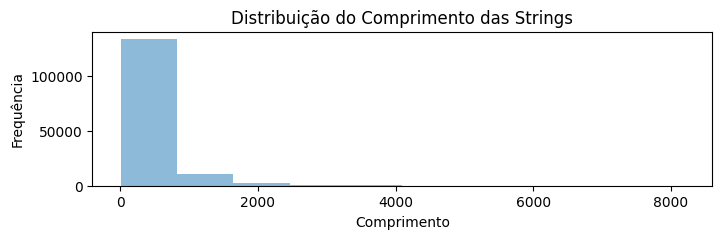

In [157]:
plt.figure(figsize=(8, 2))
plt.hist(df['review_full'].str.len(), bins=10, alpha=0.5)
plt.xlabel('Comprimento')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o do Comprimento das Strings')
plt.show()

Excluiremos os registros cujos reviews possuem mais de 2000 caracteres para reduzir o uso de GPU, mem√≥ria e tempo de processamento.

In [158]:
df = df[df['review_full'].str.len() <= 2000]

In [159]:
df.shape

(145409, 2)

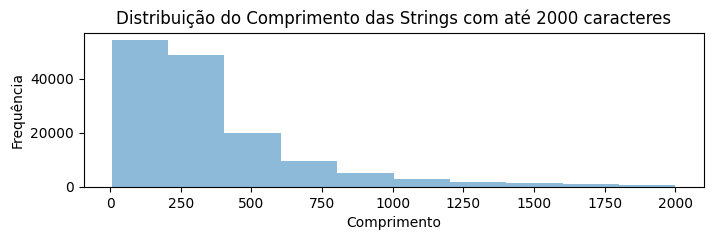

In [160]:
plt.figure(figsize=(8, 2))
plt.hist(df['review_full'].str.len(), bins=10, alpha=0.5)
plt.xlabel('Comprimento')
plt.ylabel('Frequ√™ncia')
plt.title('Distribui√ß√£o do Comprimento das Strings com at√© 2000 caracteres')
plt.show()

Data Cleaning:

In [161]:
def limpar_texto(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Remove URLs
    text = re.sub(r'[^a-zA-Z√Ä-√∫\s]', '', text.lower()) # Remove caracteres especiais e passa o texto para caixa baixa
    tokens = text.split() # Tokeniza√ß√£o
    tokens = [token for token in tokens if not token.isdigit()] # Remove n√∫meros
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens] # Remove pontua√ß√£o
    tokens = [token.strip() for token in tokens] # Remove espa√ßo em branco extra
    tokens = [token for token in tokens if len(token) > 2] # Remove palavras com menos de 3 caracteres

    # Redu√ß√£o das palavras ao seu radical
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    cleaned_text = ' '.join(tokens) # Junta os tokens de volta a um texto √∫nico
    return cleaned_text

In [162]:
# Cria nova coluna 'texto_limpo' com valores da coluna 'review_full' tratados pela fun√ß√£o limpar_texto
df['texto_limpo'] = [limpar_texto(text) for text in df['review_full'].astype(str)]
df.head(3)

rating_review                                        review_full  \
0            5.0  Totally in love with the Auro of the place, re...   
1            5.0  I went this bar 8 days regularly with my husba...   
2            5.0  We were few friends and was a birthday celebra...   

                                         texto_limpo  
0  totally love with the auro the place really be...  
1  went this bar days regularly with husband are ...  
2  were few friends and was birthday celebration ...

In [163]:
# Tokeniza√ß√£o
df['texto_limpo'] = df['texto_limpo'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['texto_limpo'] = df['texto_limpo'].apply(lambda x: [word for word in x if word not in stop_words])

In [164]:
df.head(3)

rating_review                                        review_full  \
0            5.0  Totally in love with the Auro of the place, re...   
1            5.0  I went this bar 8 days regularly with my husba...   
2            5.0  We were few friends and was a birthday celebra...   

                                         texto_limpo  
0  [totally, love, auro, place, really, beautiful...  
1  [went, bar, days, regularly, husband, fully, s...  
2  [friends, birthday, celebration, food, good, t...

In [165]:
df['num_elementos'] = df['texto_limpo'].apply(len) # Contagem de elementos em cada registro
indice_max_elementos = df['num_elementos'].idxmax() # √çndice do registro com o maior n√∫mero de elementos
registro_max_elementos = df.loc[indice_max_elementos, 'texto_limpo'] # Registro com o maior n√∫mero de elementos

print("O registro com o maior n√∫mero de elementos √©:", registro_max_elementos)
print("N√∫mero de elementos:", len(registro_max_elementos))

df = df.drop('num_elementos', axis=1) # Remover a coluna 'num_elementos' se n√£o for mais necess√°ria

O registro com o maior n√∫mero de elementos √©: ['restaurant', 'outer', 'circle', 'next', 'barbeque', 'nation', 'second', 'floor', 'cosy', 'restaurant', 'nice', 'simple', 'decor', 'comfortable', 'seating', 'along', 'soft', 'music', 'playing', 'food', 'drinks', 'drinks', 'one', 'hard', 'drink', 'one', 'beer', 'also', 'juice', 'starting', 'offer', 'bar', 'starters', 'manchow', 'soup', 'one', 'veg', 'non', 'veg', 'manchow', 'well', 'cooked', 'balance', 'taste', 'along', 'order', 'fish', 'orly', 'crispy', 'corns', 'chilli', 'fish', 'chilli', 'mushroom', 'tandoori', 'chicken', 'tikka', 'must', 'try', 'dish', 'fish', 'orly', 'use', 'basa', 'fish', 'ten', 'pieces', 'guess', 'carte', 'menu', 'size', 'seriously', 'loved', 'chilli', 'fish', 'awesome', 'crispy', 'side', 'crunchy', 'sides', 'soft', 'inside', 'also', 'crispy', 'corn', 'nice', 'quantity', 'two', 'people', 'easily', 'enjoy', 'dish', 'starters', 'chilli', 'mushroom', 'frind', 'vegetarian', 'hve', 'take', 'care', 'order', 'chicken', 't

In [166]:
textos = df['texto_limpo'].astype(str).tolist()
rotulos = df['rating_review'].tolist()

X_treino, X_teste, y_treino, y_teste = train_test_split(textos, rotulos, test_size=0.1, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_treino)
X_treino = tokenizer.texts_to_sequences(X_treino)
X_teste = tokenizer.texts_to_sequences(X_teste)

max_len = 241  # comprimento m√°ximo das sequ√™ncias
vocab_size = 130000 # comprimento m√°ximo do vocabul√°rio
X_treino = pad_sequences(X_treino, maxlen=max_len)
X_teste = pad_sequences(X_teste, maxlen=max_len)

y_treino = to_categorical(y_treino)
y_teste = to_categorical(y_teste)


In [167]:
vocabulario = set()
for texto in X_treino:
    tokens = str(texto).split()  # quebra o texto em tokens (palavras)
    vocabulario.update(set(tokens))  # adiciona os tokens ao vocabul√°rio
tamanho_vocabulario = len(vocabulario)
print("O tamanho do vocabul√°rio √©:", tamanho_vocabulario)

O tamanho do vocabul√°rio √©: 125059


## Modelagem

O modelo foi constru√≠do tendo como refer√™ncia o modelo de classifica√ß√£o de texto multicateg√≥rico do [Tensorflow](https://www.tensorflow.org/tutorials/keras/text_classification?hl=pt-br).

No desenvolvimento do modelo foram testados:

 - Layers **LSTM** e **Bidirecional(LSTM)**, inspirados no modelo [BERT](https://www.tensorflow.org/text/tutorials/classify_text_with_bert?hl=pt-br) do tensorflow, cujo objetivo seria capturar sequ√™ncias de palavras como fatores determinantes para o rating do usu√°rio.

 - Layer convolucional de 1 dimens√£o (**Conv1D**), que apesar de n√£o constar na documenta√ß√£o do tensorflow para o problema em quest√£o, foram encontradas diversas ref√™ncias de uso na web.

A utiliza√ß√£o dos layers citados acima n√£o melhoraram as m√©tricas de treinamento. No bloco de c√≥digo foram deixados #exemplos de suas utiliza√ß√µes para consulta caso desejado. As camadas de mem√≥ria aumentaram a demanda por GPU e RAM substancialmente.

 - **Dropout** e **regulariza√ß√£o L1/L2**, cujo objetivo era diminuir overfitting e melhorar a generaliza√ß√£o. Na pr√°tica ambos os m√©todos alteraram as din√¢micas de aprendizado, mas foram incapazes de melhorar os resultados.

Todas as abordagens listadas foram testadas em diversas configura√ß√µes de hiperpar√¢metros e combinadas entre si.

O modelo final escolhido foi testato com diversas camadas ocultas e quantidade de neur√¥nios variados.

Todas essas varia√ß√µes tiveram seus melhores resultados convergindo para o mesmo desempenho, ent√£o foi escolhida a vers√£o mais simples e r√°pida.


As m√©tricas de avalia√ß√£o escolhidas foram:
- **accuracy** para medir a quantidade de acertos de classifica√ß√£o.
- **MeanSquaredError** para medir a dist√¢ncia m√©dia entre as previs√µes e os valores reais. O objetivo desta m√©trica √© determinar se o modelo ainda est√° melhorando no caso da **accuracy** permanecer constante,  ou seja, se os erros est√£o convergindo para acerto.

In [168]:
np.random.seed(42)

# Cria o modelo
modelo_1 = Sequential()
modelo_1.add(Embedding(vocab_size, 12)) # Adiciona uma camada de embedding para representa√ß√£o vetorial das palavras.
modelo_1.add(GlobalAveragePooling1D()) # Retorna um vetor de sa√≠da com comprimento fixo
modelo_1.add(Dense(12, activation='relu')) # Camada oculta
modelo_1.add(Dense(6, activation='softmax')) # Adiciona uma camada densa de sa√≠da para classifica√ß√£o / ativa√ß√£o softmax √© geralmente usada para problemas de classifica√ß√£o com mais de duas classes.
modelo_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', "MeanSquaredError"]) # Compila o modelo /'categorical_crossentropy' √© usada para problemas de classifica√ß√£o multicateg√≥rica.
modelo_1.summary() # Resume o modelo

#modelo_n.add(Bidirectional(LSTM(32, kernel_regularizer=regularizers.l2(0.01), dropout=0.2)))
#modelo_n.add(Dense(32, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
#modelo_n.add(Dropout(0.2))

# Treina o modelo
historico_1 = modelo_1.fit(X_treino, y_treino, batch_size=512, epochs=100, validation_data=(X_teste, y_teste), callbacks=[EarlyStopping(monitor='val_mean_squared_error', patience=5, restore_best_weights=True)])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 12)          1560000   
                                                                 
 global_average_pooling1d (G  (None, 12)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
Total params: 1,560,234
Trainable params: 1,560,234
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
256/256 [==============================] - 55s 196ms/step - loss: 1.3701 - accuracy: 0.4861 - mean_s

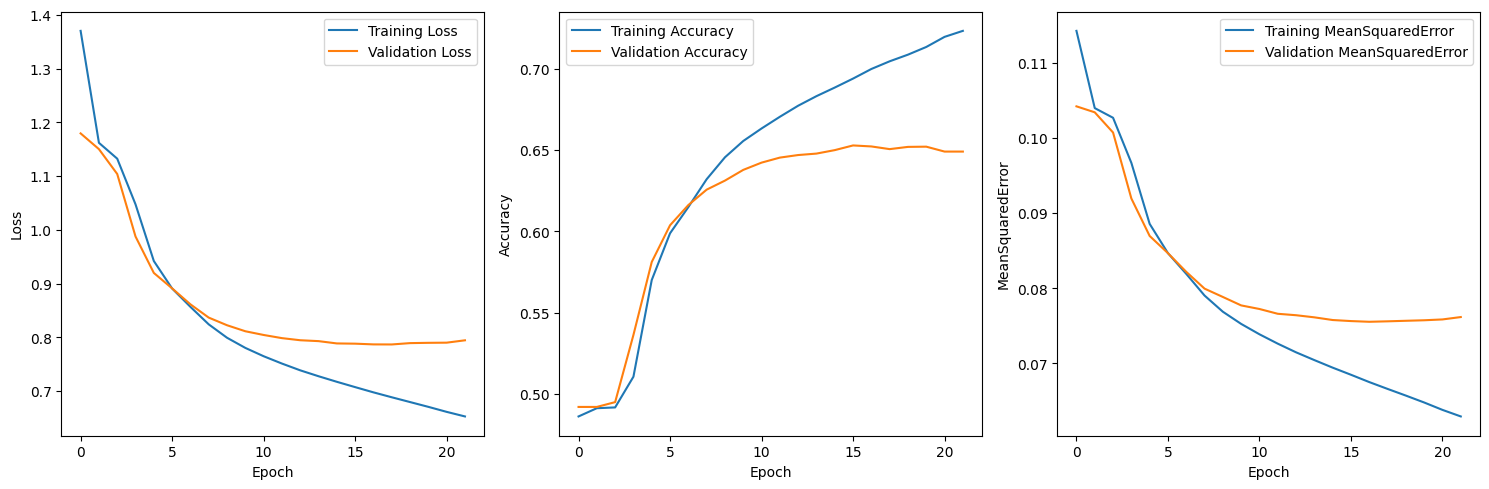

In [169]:
# Extrair as m√©tricas de treinamento e valida√ß√£o
loss = historico_1.history['loss']
val_loss = historico_1.history['val_loss']
accuracy = historico_1.history['accuracy']
val_accuracy = historico_1.history['val_accuracy']
MSE = historico_1.history['mean_squared_error']
val_MSE = historico_1.history['val_mean_squared_error']

# Criar a figura com tr√™s subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotar a curva de perda
axs[0].plot(loss, label='Training Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plotar a curva de precis√£o
axs[1].plot(accuracy, label='Training Accuracy')
axs[1].plot(val_accuracy, label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Plotar a curva de MSE
axs[2].plot(MSE, label='Training MeanSquaredError')
axs[2].plot(val_MSE, label='Validation MeanSquaredError')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('MeanSquaredError')
axs[2].legend()

# Ajustar o espa√ßamento entre os subplots
plt.tight_layout()

# Exibir a figura
plt.show()

As curvas de Loss, Accuracy e MeanSquaredError tiveram o comportamento esperado do aprendizado.

In [170]:
# Fazer previs√µes com o conjunto de teste
previsoes = modelo_1.predict(X_teste)
previsoes_classes = np.argmax(previsoes, axis=1)

# Avaliar o desempenho do modelo
resultado = modelo_1.evaluate(X_teste, y_teste)

# Resultado cont√©m a perda e as m√©tricas calculadas durante a avalia√ß√£o
loss = resultado[0]
accuracy = resultado[1]

455/455 [==============================] - 1s 3ms/step - loss: 0.7868 - accuracy: 0.6524 - mean_squared_error: 0.0755


## Resultado

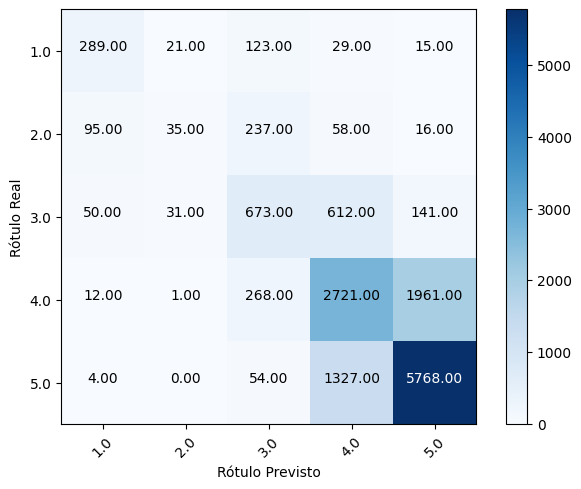

In [171]:
cm = confusion_matrix(np.argmax(y_teste, axis=1), previsoes_classes)

# Fun√ß√£o auxiliar para plotar a matriz de confus√£o
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('R√≥tulo Real')
    plt.xlabel('R√≥tulo Previsto')

# Plotando a matriz de confus√£o
plot_confusion_matrix(cm, [1., 2., 3., 4., 5.])
plt.show()

A matriz confus√£o demonstra que o modelo alcan√ßou um bom resultado, pois os maiores valores se concentram na diagonal principal e v√£o diminuindo gradativamente conforme se distanciam desta.

In [172]:
# Acur√°cia
accuracy = accuracy_score(np.argmax(y_teste, axis=1), previsoes_classes)
print("Acur√°cia:", accuracy)

# Relat√≥rio de Classifica√ß√£o
target_names = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']
classification_rep = classification_report(np.argmax(y_teste, axis=1), previsoes_classes, target_names=target_names)
print("Relat√≥rio de Classifica√ß√£o:")
print(classification_rep)

Acur√°cia: 0.6523622859500722
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

    Rating 1       0.64      0.61      0.62       477
    Rating 2       0.40      0.08      0.13       441
    Rating 3       0.50      0.45      0.47      1507
    Rating 4       0.57      0.55      0.56      4963
    Rating 5       0.73      0.81      0.77      7153

    accuracy                           0.65     14541
   macro avg       0.57      0.50      0.51     14541
weighted avg       0.64      0.65      0.64     14541



O Relat√≥rio de Classifica√ß√£o reitera o bom desempenho geral do modelo, principalmente nos rating extremos 1 e 5.

Tamb√©m fica evidente uma maior dificuldade em classificar especificamente o rating 2.

An√°lise dos piores erros de classifica√ß√£o:

In [173]:
# Selecionando registros com r√≥tulo real igual a 5 e r√≥tulo previsto igual a 1
indices_selecionados = np.where((np.argmax(y_teste, axis=1) == 5) & (previsoes_classes == 1))[0]

print("R√≥tulo Real: 5  /  R√≥tulo Previsto: 1 \n")
# Iterando sobre os registros selecionados e imprimindo as informa√ß√µes
for indice in indices_selecionados:
    print("Registro ", indice, " Review: ", df.iloc[indice, 1])

R√≥tulo Real: 5  /  R√≥tulo Previsto: 1 

Registro  2464  Review:  It is a great restaurant. Mr Sumit Kumar miss Radha served us very well. Great place, great experience. Must visit. 
Registro  5481  Review:  Good restaurant for Indian food great prompt service nice rasmalai cake will recommend all family and friends. Thanks for delightful evenings.
Registro  7810  Review:  hard rock cafe provides excellent service with friendly staff . Everything that you order would taste delicious. highly recommended.
Registro  8912  Review:  Was invited by my friend for a dinner. Had an extremely authentic and flavourful experience of chinese and thai food


In [174]:
# Selecionando registros com r√≥tulo real igual a 5 e r√≥tulo previsto igual a 1
indices_selecionados = np.where((np.argmax(y_teste, axis=1) == 1) & (previsoes_classes == 5))[0]

print("R√≥tulo Real: 1  /  R√≥tulo Previsto: 5 \n")
# Iterando sobre os registros selecionados e imprimindo as informa√ß√µes
for indice in indices_selecionados:
    print("Registro ", indice, " Review: ", df.iloc[indice, 1])

R√≥tulo Real: 1  /  R√≥tulo Previsto: 5 

Registro  1948  Review:  Excellent food, mutton rogan josh was amazing, best in class service (Shivam was exceptional and kind)and live music.. had a great time.
Registro  2126  Review:  Visited for a quick get together with friends, was not disappointed at all. The selection of food and drinks is world class. Topesh and his team is very friendly. Will be back soon..
Registro  2951  Review:  Best food in West Delhi . Good service , great salad bar , excellent deserts and a wide variety of wine .
Registro  3299  Review:  Went their to celebrate my friend's birthday. We'd thier pizza and potato wedges . Pizza was very good the potato wedges could be better .ü§ó Overall good experience üëç
Registro  3877  Review:  Fantastic buffet choice on the day of my visit. Huge choice of international and Indian cuisine. Pleasent setting. Nice staff
Registro  4544  Review:  Veda has beautiful combination of baroque interiors and authentique indian cuisine. 

**Real: 5  / Previsto: 1** - Nesse extremo podemos ver que o modelo ainda pode ser melhorado pois ocorrem 6 casos em que as reviews s√£o explicitamente boas, por√©m classificadas como ruins.

**Real: 1 / Previsto:** 5 - Neste outro extremo observamos algo interessante: As 30 reviews s√£o boas e o modelo as classifica como tal, por√©m review e rating s√£o contradit√≥rios. Possivelmente o usu√°rio clicou errado ou pensou que a classifica√ß√£o 1 fosse a melhor.

## Conclus√£o:

Levando em considera√ß√£o todos os aspectos descritos na constru√ß√£o do projeto e nas an√°lises de resultado, conclui-se que o modelo atingiu bons resultados. O projeto em si representou um desafio no √¢mbito explorat√≥rio e executivo especialmente por se tratar de uma classifica√ß√£o multi-categ√≥rica ordinal, enquanto outros projetos similares encontrados como refer√™ncia tratavam de classifica√ß√£o multi-categ√≥rica nominal ou classifica√ß√£o bin√°ria.